In [1]:
import pandas as pd
import numpy as np
import networkx as nx
df = pd.read_csv("./user.csv")

In [2]:
df['compliment_count'] = df['compliment_more'] + df['compliment_profile'] + \
    df['compliment_cute'] + df['compliment_list'] + df['compliment_note'] + \
    df['compliment_plain'] + df['compliment_cool'] + df['compliment_funny'] +\
    df['compliment_writer'] + df['compliment_photos'] + df['compliment_hot']
df['votes'] = df['useful'] + df['funny'] + df['cool']

drop_list = ['more', 'profile', 'cute', 'list', 'note', 'plain', 'cool', 'funny', 'writer', 'photos', 'hot']
for i in range(11):
    drop_list[i] = 'compliment_' + drop_list[i]
print(drop_list)
    
df = df.drop(drop_list, axis=1)
df = df.drop(columns=['useful', 'funny', 'cool'])
df.head()

['compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos', 'compliment_hot']


,Unnamed: 0,user_id,name,review_count,yelping_since,elite,friends,fans,average_stars,compliment_count,votes
0,1817726,baysubsyBl7omYmSoAL_nQ,R Richard,2,2014-06-04 20:40:22,NaN,"YKVaewqx90wPPNCEfPTzUw, wc2vSdN_TdFR9BonSEHbRw...",0,4.50,0,0
1,1927844,dqIFJVJVNb3srqK_vobrfw,Jenny,16,2014-08-13 02:02:41,NaN,None,0,4.69,0,4
2,1057397,XsEZazFrQDZhZqrC0t5sCw,Ann,3,2018-06-05 13:15:34,NaN,"Bj8gb3mKTnORVy1MC8FylQ, lwl_YWQ-1iXmcA-mHVG_jA...",0,1.67,0,1
3,1513691,LdtFVKWwcO6cxsVDCBXqLA,W,5,2009-03-31 19:00:59,NaN,None,0,2.00,0,5
4,1073346,NUApbP2YOPnVsTPSvMsdxQ,Amber,11,2013-07-14 20:55:11,NaN,"j3GVN7VpDZ2I3_g332h3TQ, 3lKGcCwbxKB1bAgfCyVsLg...",0,4.17,0,6


In [3]:
df['years_yelped'] = df['yelping_since'].apply(lambda x: x.split('-')[0])
df['years_yelped'] = 2022 - df['years_yelped'].astype(int)
df['num_friends'] = df['friends'].apply(lambda x: len(x.split(',')))
df['num_friends'] = np.where(df['friends']=='None', 0, df['num_friends'])

clean = df.drop(columns=['Unnamed: 0', 'user_id', 'name', 'yelping_since', 'elite', 'friends', 'fans', 'compliment_count'])
#normalized_clean=(clean-clean.mean())/clean.std()
normalized_clean=clean
clean.head()

,review_count,average_stars,votes,years_yelped,num_friends
0,2,4.50,0,8,223
1,16,4.69,4,8,0
2,3,1.67,1,4,56
3,5,2.00,5,13,0
4,11,4.17,6,9,81


<b>Euclidean</b>

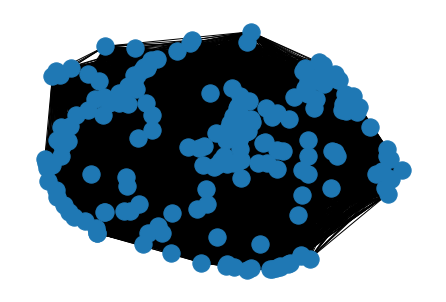

In [4]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(normalized_clean.values, metric='euclidean')
dist_matrix = squareform(distances)

G = G=nx.from_numpy_matrix(dist_matrix)
nx.draw(G)
np.savetxt('100131001-100131002—T5EU.csv', dist_matrix ,fmt='%.2f', delimiter=',')

<b>Cosine</b>

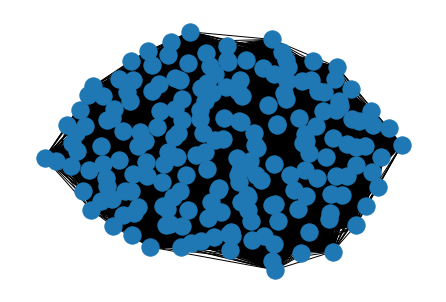

In [5]:
distances = pdist(normalized_clean.values, metric='cosine')
dist_matrix = squareform(distances)

G = G=nx.from_numpy_matrix(dist_matrix)
nx.draw(G)
np.savetxt('100131001-100131002—T5CO.csv', dist_matrix ,fmt='%.2f', delimiter=',')

<b>Mahalanobis</b>

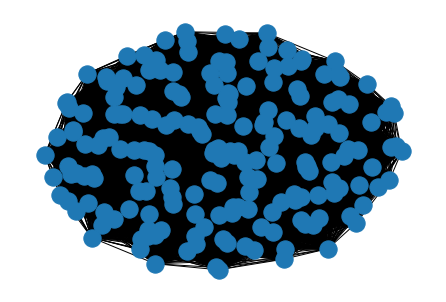

In [6]:
distances = pdist(normalized_clean.values, metric='mahalanobis', VI=None)
dist_matrix = squareform(distances)

G = G=nx.from_numpy_matrix(dist_matrix)
nx.draw(G)
np.savetxt('100131001-100131002—T5MA.csv', dist_matrix ,fmt='%.2f', delimiter=',')

In [7]:
clean.to_csv('./clean_user.csv')
clean.to_csv('./100131001-100131002—T5Data.csv', index=False)